In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from math import *

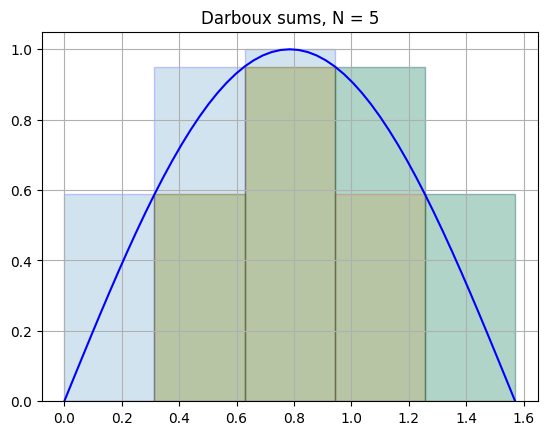

In [11]:
f = lambda x: np.sin(2 * x) # задаём массив значений функции
a = 0; b = pi/2; N = 5 # начальная, конечная точки, кол-во разбиений
n = 10 # кол-во строк в dx

x = np.linspace(a,b,N+1) # массив аргументов для построения сумм дарбу
y = f(x) # массив значений для сумм дарбу

X = np.linspace(a,b,n*N+1) # массив аргументов для построения графика
Y = f(X) # массив значений для построения графика
plt.plot(X,Y,'b') # график функции

# создаём массив из "разбиений" одного элемента суммы дарбу
# представляем этот массив в виде столбца
# по сути если бы мы брали каждый левый угол прямоугольника за 0 (начало отсчёта), это были бы координаты каждой точки разбиения

dx = np.broadcast_to(np.linspace(0,(b-a)/N,n), (1,n)).T

# x[:-1] - массив координат "левых нижних углов" каждого прямоугольника (эл-та суммы)
# x[:-1] + dx - т.к. начало отсчёта одно, то мы сдвигаем каждое значение dx и получаем
# координаты разбения разбиений (🤯)
# F - значения функции в каждой из таких точек

F = f(x[:-1] + dx)

rng = np.random.default_rng()
y_rand = rng.choice(F, axis=0) # выбираем случайное значение из F
y_upper = np.amax(F,0) # наибольшее значение из F
y_lower = np.amin(F,0) # наименьшее значение из F

plt.grid(visible = True)

plt.bar(x[1:],y_upper,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b') # верхняя дарбу
plt.bar(x[1:],y_lower,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='r') # нижняя дарбу
plt.bar(x[1:],y_rand,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='g') # сумма Римана

plt.title('Darboux sums, N = {}'.format(N))

plt.show()

In [13]:
df = pd.DataFrame(data=[y_upper,y_lower,y_rand],index=["Супремум","Инфимум","Оснащение"],columns= [i for i in range(1,N+1)])
df

,1,2,3,4,5
Супремум,0.587785,0.951057,0.999391,0.951057,5.877853e-01
Инфимум,0.000000,0.587785,0.951057,0.587785,1.224647e-16
Оснащение,0.000000,0.587785,0.951057,0.951057,5.877853e-01


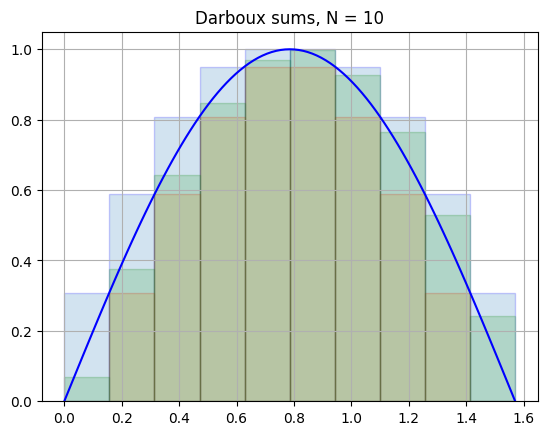

In [14]:
f = lambda x: np.sin(2 * x) # задаём массив значений функции
a = 0; b = pi/2; N = 10 # начальная, конечная точки, кол-во разбиений
n = 10 # кол-во строк в dx

x = np.linspace(a,b,N+1) # массив аргументов для построения сумм дарбу
y = f(x) # массив значений для сумм дарбу

X = np.linspace(a,b,n*N+1) # массив аргументов для построения графика
Y = f(X) # массив значений для построения графика
plt.plot(X,Y,'b') # график функции

# создаём массив из "разбиений" одного элемента суммы дарбу
# представляем этот массив в виде столбца
# по сути если бы мы брали каждый левый угол прямоугольника за 0 (начало отсчёта), это были бы координаты каждой точки разбиения

dx = np.broadcast_to(np.linspace(0,(b-a)/N,n), (1,n)).T

# x[:-1] - массив координат "левых нижних углов" каждого прямоугольника (эл-та суммы)
# x[:-1] + dx - т.к. начало отсчёта одно, то мы сдвигаем каждое значение dx и получаем
# координаты разбения разбиений (🤯)
# F - значения функции в каждой из таких точек

F = f(x[:-1] + dx)

rng = np.random.default_rng()
y_rand = rng.choice(F, axis=0) # выбираем случайное значение из F
y_upper = np.amax(F,0) # наибольшее значение из F
y_lower = np.amin(F,0) # наименьшее значение из F

plt.grid(visible = True)

plt.bar(x[1:],y_upper,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b') # верхняя дарбу
plt.bar(x[1:],y_lower,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='r') # нижняя дарбу
plt.bar(x[1:],y_rand,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='g') # сумма Римана

plt.title('Darboux sums, N = {}'.format(N))

plt.show()

In [15]:
df = pd.DataFrame(data=[y_upper,y_lower,y_rand],index=["Супремум","Инфимум","Оснащение"],columns= [i for i in range(1,N+1)])
df

,1,2,3,4,5,6,7,8,9,10
Супремум,0.309017,0.587785,0.809017,0.951057,1.000000,1.000000,0.951057,0.809017,0.587785,3.090170e-01
Инфимум,0.000000,0.309017,0.587785,0.809017,0.951057,0.951057,0.809017,0.587785,0.309017,1.224647e-16
Оснащение,0.069756,0.374607,0.642788,0.848048,0.970296,0.997564,0.927184,0.766044,0.529919,2.419219e-01


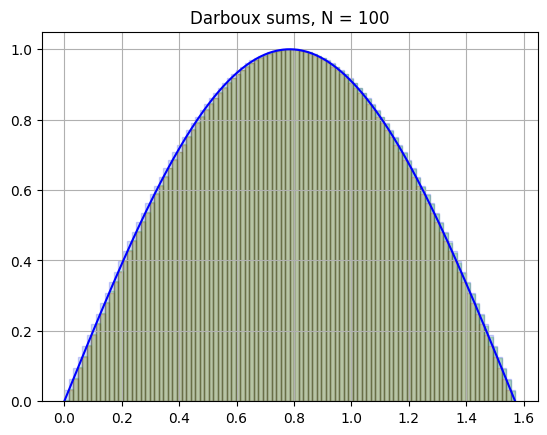

In [16]:
f = lambda x: np.sin(2 * x) # задаём массив значений функции
a = 0; b = pi/2; N = 100 # начальная, конечная точки, кол-во разбиений
n = 10 # кол-во строк в dx

x = np.linspace(a,b,N+1) # массив аргументов для построения сумм дарбу
y = f(x) # массив значений для сумм дарбу

X = np.linspace(a,b,n*N+1) # массив аргументов для построения графика
Y = f(X) # массив значений для построения графика
plt.plot(X,Y,'b') # график функции

# создаём массив из "разбиений" одного элемента суммы дарбу
# представляем этот массив в виде столбца
# по сути если бы мы брали каждый левый угол прямоугольника за 0 (начало отсчёта), это были бы координаты каждой точки разбиения

dx = np.broadcast_to(np.linspace(0,(b-a)/N,n), (1,n)).T

# x[:-1] - массив координат "левых нижних углов" каждого прямоугольника (эл-та суммы)
# x[:-1] + dx - т.к. начало отсчёта одно, то мы сдвигаем каждое значение dx и получаем
# координаты разбения разбиений (🤯)
# F - значения функции в каждой из таких точек

F = f(x[:-1] + dx)

rng = np.random.default_rng()
y_rand = rng.choice(F, axis=0) # выбираем случайное значение из F
y_upper = np.amax(F,0) # наибольшее значение из F
y_lower = np.amin(F,0) # наименьшее значение из F

plt.grid(visible = True)

plt.bar(x[1:],y_upper,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b') # верхняя дарбу
plt.bar(x[1:],y_lower,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='r') # нижняя дарбу
plt.bar(x[1:],y_rand,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='g') # сумма Римана

plt.title('Darboux sums, N = {}'.format(N))

plt.show()

In [17]:
df = pd.DataFrame(data=[y_upper,y_lower,y_rand],index=["Супремум","Инфимум","Оснащение"],columns= [i for i in range(1,N+1)])
df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
Супремум,0.031411,0.062791,0.094108,0.125333,0.156434,0.187381,0.218143,0.248690,0.278991,0.309017,...,0.309017,0.278991,0.248690,0.218143,0.187381,0.156434,0.125333,0.094108,0.062791,3.141076e-02
Инфимум,0.000000,0.031411,0.062791,0.094108,0.125333,0.156434,0.187381,0.218143,0.248690,0.278991,...,0.278991,0.248690,0.218143,0.187381,0.156434,0.125333,0.094108,0.062791,0.031411,1.224647e-16
Оснащение,0.003491,0.034899,0.066274,0.097583,0.128796,0.159881,0.190809,0.221548,0.252069,0.282341,...,0.305695,0.275637,0.245307,0.214735,0.183951,0.152986,0.121869,0.090633,0.059306,2.792164e-02
